# First step: cleaning the database

## Importing dictionaries & database

In [1]:
import re
import pandas as pd

In [2]:
attacks = pd.read_csv("/Users/Marc/Desktop/lectures/Project-1-Pandas/data/attacks.csv", encoding = 'unicode_escape')
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking the 'null´values across the dataset

In [3]:
pd.isnull(attacks)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
25719,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
25720,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
25721,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [4]:
pd.isnull(attacks).sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [5]:
pd.isnull(attacks).sum().min()

17021

## Checking first/last 5 rows of the dataset

In [6]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
attacks.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Getting rid of the empty rows setting a thresh of 6

In [8]:
attacks_clean1 = attacks.copy()
attacks_clean1.dropna(axis = 0, inplace = True, thresh=6)
attacks_clean1

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


## Getting rid of the empty columns setting a thresh of 6

In [9]:
attacks_clean2 = attacks_clean1.copy()
attacks_clean2.dropna(axis = 1, inplace = True, thresh=6)
attacks_clean2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [10]:
attacks_clean2.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
4253,1956.05.26.R,Reported 26-May-1956,1956.0,Boating,SOUTH AFRICA,Western Cape Province,Plettenberg Bay,Fishing,multiple boats including B.J. C. Brunt,NaN,...,N,NaN,White shark,"Natal Mercuy, 5/26/1956",1956.05.26.R-Brunt-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.05.26.R,1956.05.26.R,2050.0


## Removing the columns that are not adding any value

In [11]:
attacks_clean3 = attacks_clean2.drop(columns=["pdf","href formula","href","Case Number.1","Case Number.2"])
attacks_clean3

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0


## Counting duplicated case numbers & getting rid of them

In [12]:
attacks_clean3["Case Number"].value_counts()

1983.06.15      2
1913.08.27.R    2
2009.12.18      2
2014.08.02      2
1920.00.00.b    2
               ..
1999.09.10      1
1999.09.16      1
1999.09.18      1
1999.09.24      1
ND.0001         1
Name: Case Number, Length: 6285, dtype: int64

In [13]:
attacks_clean3.duplicated(subset=['Case Number']).value_counts()

False    6286
True       16
dtype: int64

In [14]:
attacks_clean3_2 = attacks_clean3.copy()
attacks_clean3_2.drop_duplicates(subset=["Case Number"],keep="first",inplace=True)
attacks_clean3_2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0


# Hypothesis 1: Over the time, Australia is the country where men had more attacks whilst surfing

## Total sex regardless of gender

In [16]:
import re
sex_filtered = attacks_clean3_2.dropna(subset=["Sex "])
sex_filtered

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0


In [17]:
sex_filtered["Sex "].value_counts()

M      5082
F       634
M         2
N         2
lli       1
.         1
Name: Sex , dtype: int64

## Checking how many mens

In [18]:
only_men = sex_filtered[sex_filtered["Sex "].str.contains("^M$")]
only_men

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298.0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0


In [19]:
only_men["Sex "].value_counts()

M    5082
Name: Sex , dtype: int64

## Doing the same with women

In [20]:
only_women = sex_filtered[sex_filtered["Sex "].str.contains(".*F.*")]
only_women

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
14,2018.05.00,May 2018,2018.0,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,N,NaN,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",6289.0
40,2018.02.23,23-Feb-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Little Congwong Beach, La Perouse",Swimming,Anna Shurapey,F,55,Laceratons to right leg & foot,N,"19h00, Dusk","Juvenile white shark, 2.7 to 3.2 m","B. Myatt, GSAF",6263.0
43,2018.02.14,14-Feb-2018,2018.0,Invalid,AUSTRALIA,Queensland,Mooloolaba Beach,Swimming,Sharna Babd,F,NaN,"Collision / No injury, no attack",N,18h00,Possibly a wobbegong,"Sunshine Coast Daily, 2/15/2018",6260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,ND.0082,"No date, Before 8-May-1965",0.0,Unprovoked,GREECE,Island of Volos,Eastern shore,Swimming,woman,F,NaN,FATAL,Y,NaN,NaN,"Sydney Morning Herald, 5/8/1965",72.0
6245,ND.0060,Before 19-Jun-1959,0.0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",58.0
6247,ND.0058,Before 1958,0.0,Unprovoked,FIJI,Kadavu Island Group,"18.8S, 178.25E",Swimming with fish attached to belt,Fijian girl,F,NaN,"""Severely injured when fish were seized by shark""",N,NaN,NaN,"V.M. Coppleson (1958), p.259",56.0
6279,ND.0023,No date,0.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,NaN,Ankle bitten,N,NaN,NaN,"L. Green in Tavern of the Seas, p.182",24.0


## Now we need to concatenate the data for both genders

In [21]:
concatenated_sex = pd.concat([only_men,only_women],sort=False,ignore_index=True)
concatenated_sex

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
1,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
2,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0
3,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298.0
4,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,ND.0082,"No date, Before 8-May-1965",0.0,Unprovoked,GREECE,Island of Volos,Eastern shore,Swimming,woman,F,NaN,FATAL,Y,NaN,NaN,"Sydney Morning Herald, 5/8/1965",72.0
5712,ND.0060,Before 19-Jun-1959,0.0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",58.0
5713,ND.0058,Before 1958,0.0,Unprovoked,FIJI,Kadavu Island Group,"18.8S, 178.25E",Swimming with fish attached to belt,Fijian girl,F,NaN,"""Severely injured when fish were seized by shark""",N,NaN,NaN,"V.M. Coppleson (1958), p.259",56.0
5714,ND.0023,No date,0.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,NaN,Ankle bitten,N,NaN,NaN,"L. Green in Tavern of the Seas, p.182",24.0


## Changing the variable "Year" so it's not a float number

In [22]:
concatenated_sex_copy = concatenated_sex.copy()
concatenated_sex_copy["Year"] = pd.options.display.float_format = '{:.0f}'.format
concatenated_sex_copy

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.09,09-Jun-2018,<built-in method format of str object at 0x000...,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301
1,2018.06.08,08-Jun-2018,<built-in method format of str object at 0x000...,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300
2,2018.06.04,04-Jun-2018,<built-in method format of str object at 0x000...,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299
3,2018.06.03.b,03-Jun-2018,<built-in method format of str object at 0x000...,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298
4,2018.06.03.a,03-Jun-2018,<built-in method format of str object at 0x000...,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,ND.0082,"No date, Before 8-May-1965",<built-in method format of str object at 0x000...,Unprovoked,GREECE,Island of Volos,Eastern shore,Swimming,woman,F,NaN,FATAL,Y,NaN,NaN,"Sydney Morning Herald, 5/8/1965",72
5712,ND.0060,Before 19-Jun-1959,<built-in method format of str object at 0x000...,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",58
5713,ND.0058,Before 1958,<built-in method format of str object at 0x000...,Unprovoked,FIJI,Kadavu Island Group,"18.8S, 178.25E",Swimming with fish attached to belt,Fijian girl,F,NaN,"""Severely injured when fish were seized by shark""",N,NaN,NaN,"V.M. Coppleson (1958), p.259",56
5714,ND.0023,No date,<built-in method format of str object at 0x000...,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,NaN,Ankle bitten,N,NaN,NaN,"L. Green in Tavern of the Seas, p.182",24


In [23]:
concatenated_sex_copy = pd.concat([only_men,only_women],sort=False,ignore_index=True)
concatenated_sex_copy

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,ND.0082,"No date, Before 8-May-1965",0,Unprovoked,GREECE,Island of Volos,Eastern shore,Swimming,woman,F,NaN,FATAL,Y,NaN,NaN,"Sydney Morning Herald, 5/8/1965",72
5712,ND.0060,Before 19-Jun-1959,0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",58
5713,ND.0058,Before 1958,0,Unprovoked,FIJI,Kadavu Island Group,"18.8S, 178.25E",Swimming with fish attached to belt,Fijian girl,F,NaN,"""Severely injured when fish were seized by shark""",N,NaN,NaN,"V.M. Coppleson (1958), p.259",56
5714,ND.0023,No date,0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,NaN,Ankle bitten,N,NaN,NaN,"L. Green in Tavern of the Seas, p.182",24


## Checking final number of cases by gender after cleaning

In [24]:
concatenated_sex_copy["Sex "].value_counts()

M    5082
F     634
Name: Sex , dtype: int64

## Checking activities

In [25]:
concatenated_sex_copy["Activity"].value_counts()

Surfing                                                                          942
Swimming                                                                         845
Fishing                                                                          336
Spearfishing                                                                     316
Bathing                                                                          156
                                                                                ... 
preparing to go skin diving                                                        1
Free diving for shell                                                              1
Skin diving                                                                        1
Canoe capsized with 10 occupants, 8 survived,  Hamilton swam off to seek help      1
Swimming with fish attached to  belt                                               1
Name: Activity, Length: 1375, dtype: int64

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [28]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Chart 1: Number of total cases by gender

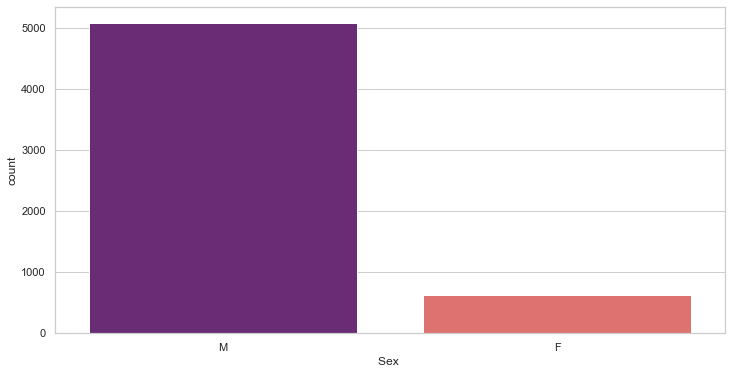

In [396]:
figure_one = sns.countplot(x=concatenated_sex_copy["Sex "], palette="magma");
figure_one.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_one.jpg", dpi=1000)

## As the focus is Surfing, extracting the data focusing on that

In [30]:
sex_df_activity = concatenated_sex_copy.copy()
sex_df_activity["only activity"] = sex_df_activity["Activity"].str.extract("(\w{7})")
sex_df_activity

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,only activity
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Surfing
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Surfing
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,NaN
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,surfing
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Swimmin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,ND.0082,"No date, Before 8-May-1965",0,Unprovoked,GREECE,Island of Volos,Eastern shore,Swimming,woman,F,NaN,FATAL,Y,NaN,NaN,"Sydney Morning Herald, 5/8/1965",72,Swimmin
5712,ND.0060,Before 19-Jun-1959,0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",58,NaN
5713,ND.0058,Before 1958,0,Unprovoked,FIJI,Kadavu Island Group,"18.8S, 178.25E",Swimming with fish attached to belt,Fijian girl,F,NaN,"""Severely injured when fish were seized by shark""",N,NaN,NaN,"V.M. Coppleson (1958), p.259",56,Swimmin
5714,ND.0023,No date,0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,NaN,Ankle bitten,N,NaN,NaN,"L. Green in Tavern of the Seas, p.182",24,NaN


In [31]:
sex_df_activity["only activity"].value_counts()

Swimmin    1045
Surfing     991
Fishing     489
Spearfi     394
Bathing     178
           ... 
Seaquar       1
circuit       1
Whyalla       1
Aircaft       1
corsair       1
Name: only activity, Length: 365, dtype: int64

In [32]:
sex_df_activity["only activity"].unique()

array(['Surfing', nan, 'surfing', 'Swimmin', 'Fishing', 'Walking',
       'Standin', 'Feeding', 'boardin', 'Paddleb', 'fishing', 'Snorkel',
       'Spearfi', 'bathing', 'Kayakin', 'Canoein', 'Skimboa', 'Attempt',
       'Kakayin', 'Washing', 'Lobster', 'Floatin', 'Windsur', 'disaste',
       'Photogr', 'Scallop', 'Treadin', 'Playing', 'Boardin', 'feeding',
       'Sitting', 'Bodysur', 'Filming', 'Transat', 'Petting', 'Teasing',
       'lobster', 'culling', 'Kitesur', 'Sailing', 'Kiteboa', 'crayfis',
       'Abalone', 'Casting', 'Longlin', 'Wrangli', 'Cleanin', 'Draggin',
       'Bodyboa', 'swimmin', 'spearfi', 'photogr', 'Jumping', 'abalone',
       'Measuri', 'Bathing', 'Paddlin', 'Crawlin', 'surface', 'Disaste',
       'Sinking', 'inflata', 'Acciden', 'Removin', 'capsize', 'paddlin',
       'Kissing', 'Lifesav', 'Competi', 'aquariu', 'Scurfin', 'Chummin',
       'Crayfis', 'makeshi', 'Killing', 'Unknown', 'stepped', 'Collect',
       'Capsize', 'Technic', 'urchins', 'mainten', 'Shipw

## Conditional filter so we can get the final numbers given the scope of the hypothesis

In [33]:
condition_1 = (sex_df_activity["only activity"] == "Surfing")
condition_2 = (sex_df_activity["Country"] == "AUSTRALIA")
condition_3 = (sex_df_activity["only activity"] == "surfing")

sex_df_activity_two = sex_df_activity[(condition_1 | condition_3) & condition_2]
sex_df_activity_two

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,only activity
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Surfing
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,surfing
13,2018.05.09,09-May-2018,2018,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,NaN,"No injury, surfboard damaged",N,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",6287,Surfing
16,2018.04.28.a,28-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Gearys Beach,Surfing,Adam Murray,M,NaN,"No injury, knocked off board by shark",N,16h50,NaN,"B. Myatt, GSAF",6284,Surfing
17,2018.04.25.b,25-Apr-2018,2018,Questionable,AUSTRALIA,New South Wales,Lennox Head,Surfing,Matthew Lee,M,NaN,No injury,N,07h00,Questionable,"B. Myatt, GSAF",6283,Surfing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,2009.01.11.b,11-Jan-2009,2009,Unprovoked,AUSTRALIA,Tasmania,Binalong Bay,Surfing,Hannah Mighall,F,13,Severe lacerations to right leg,N,15h45,"White shark, 5m","P. Kemp, GSAF; C. Black pp. 169-177",5131,Surfing
5302,2008.02.07,07-Feb-2008,2008,Unprovoked,AUSTRALIA,New South Wales,Horseshoe Bay,Surfing,Fiona Casey,F,14,Abrasions to elbow; collided with shark,N,NaN,1 m shark,"T. Peake, GSAF",5013,Surfing
5330,2007.03.20,20-Mar-2007,2007,Unprovoked,AUSTRALIA,New South Wales,South Golden Beach,Surfing,Jodie Cooper,F,42,Lacerations to 3 fingers of left hand,N,10h00,1.5 m shark,"Gold Coast Bulletin, 3/21/2007",4907,Surfing
5387,2003.01.02,02-Jan-2003,2003,Unprovoked,AUSTRALIA,Western Australia,Left break at the Hot Spot at Sheringa Beach,Surfing,Gabrielle Eason,F,NaN,"No injury, but her surfboard was bitten",N,13h00,"Bronze whaler shark, 2.5 m [8.25']","T. Peake, GSAF",4502,Surfing


In [34]:
sex_df_activity_two["only activity"].value_counts()

Surfing    203
surfing     10
Name: only activity, dtype: int64

In [35]:
sex_df_activity_three = sex_df_activity_two.copy()
sex_df_activity_three["only activity"] = sex_df_activity_three["only activity"].str.replace("s","S")
sex_df_activity_three.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,only activity
1209,2005.09.27.R,Reported 27-Sep-2005,2005,Unprovoked,AUSTRALIA,New South Wales,Arakoon's Little Bay,Surfing,Wal Lewis,M,28,"No injury, knocked off board",N,NaN,"Tiger shark, 3 m","Macleay Argues, 9/27/2005",4759,Surfing


In [36]:
sex_df_activity_three["only activity"].value_counts()

Surfing    213
Name: only activity, dtype: int64

In [37]:
sex_df_activity_three["Sex "].value_counts()

M    202
F     11
Name: Sex , dtype: int64

## Chart 2: Australian men had more attacks whilst Surfing compared to Australian women

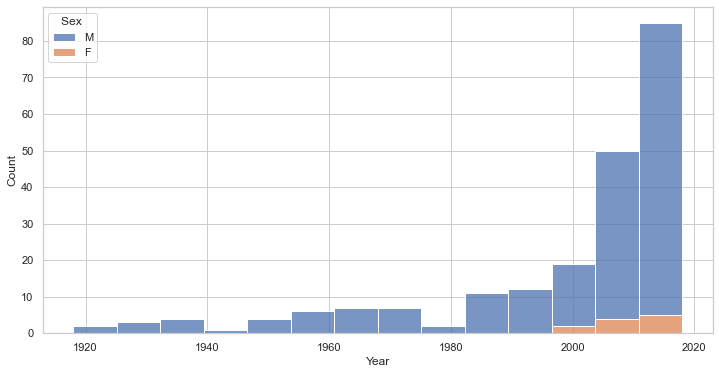

In [397]:
figure_two = sns.histplot(data=sex_df_activity_three, x="Year", hue="Sex ", multiple="stack")
figure_two.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_two.jpg", dpi=1000)

## Getting the total men that did surf across the different countries

In [40]:
condition_1 = (sex_df_activity["only activity"] == "Surfing")
condition_2 = (sex_df_activity["Sex "] == "M")
condition_3 = (sex_df_activity["only activity"] == "surfing")
sex_df_activity_men = sex_df_activity[(condition_1 | condition_3) & condition_2]
sex_df_activity_men

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,only activity
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Surfing
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Surfing
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,surfing
12,2018.05.12,12-May-2018,2018,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surfing,male,M,NaN,"Minor injury, marks on board",N,11h00,NaN,"B.Jacob, Dispatch Live, 5/12/2018",6288,Surfing
13,2018.05.09,09-May-2018,2018,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,NaN,"No injury, surfboard damaged",N,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",6287,Surfing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,1922.01.04,04-Jan-1922,1922,Unprovoked,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle",Surfing,John Manning Rowe,M,26,"FATAL, disappeared, then his shark-bitten rema...",Y,Evening,NaN,"The Argus, 1/9/1922; V.M. Coppleson (1933), N15",1068,Surfing
4193,1918.03.22,22-Mar-1918,1918,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Surfing,Arthur Cook,M,NaN,"Severe laceration to arm, necessitating surgic...",N,18h00,12' shark,"The Advertiser, 3/25/1918",1023,Surfing
4913,1828.00.00,1828,1828,Unprovoked,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,NaN,FATAL,Y,NaN,NaN,"J. Borg, p.68; L. Taylor (1993), pp.94-95",206,Surfing
4948,1779.00.00,1779,1779,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,young,"FATAL, buttock lacerated",Y,NaN,NaN,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",160,Surfing


In [41]:
sex_df_activity_men["Country"].value_counts()

USA                                      561
AUSTRALIA                                202
SOUTH AFRICA                             109
BRAZIL                                    33
REUNION                                   20
NEW ZEALAND                               10
MEXICO                                     8
INDONESIA                                  6
NEW CALEDONIA                              6
COSTA RICA                                 4
ECUADOR                                    4
JAPAN                                      3
VENEZUELA                                  3
FIJI                                       2
FRENCH POLYNESIA                           2
UNITED KINGDOM                             1
URUGUAY                                    1
DOMINICAN REPUBLIC                         1
GREECE                                     1
ANGOLA                                     1
EL SALVADOR                                1
MOZAMBIQUE                                 1
OKINAWA   

## Filtering the info so we can only see the top 5 countries

In [42]:
top_five_countries_surf = sex_df_activity_men["Country"].value_counts()[:5]
top_five_countries_surf

USA             561
AUSTRALIA       202
SOUTH AFRICA    109
BRAZIL           33
REUNION          20
Name: Country, dtype: int64

## Chart 3: Top 5 countries by surfer mens attacked

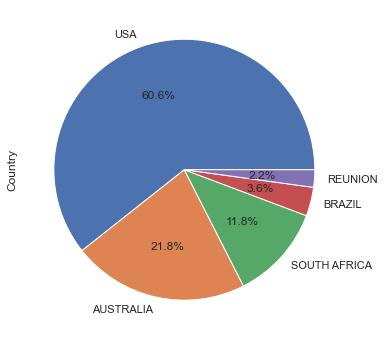

In [398]:
figure_three = top_five_countries_surf.plot.pie(autopct="%.1f%%")
figure_three.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_three.jpg", dpi=1000)

In [44]:
sex_df_activity_men["Year"].value_counts()

2016    42
2012    41
2015    40
2008    37
2014    36
        ..
1949     1
1960     1
1961     1
1962     1
0        1
Name: Year, Length: 82, dtype: int64

# Hypothesis 2: 2015 was the year with less accidents across all activities in the last 10 years. From the top 3 countries for that year, 30% of the accidents where fatal and mainly with men involved (60% of the total cases within this scope where men)

## First of all, cleaning the "Fatal (Y/N)" variable

In [45]:
concatenated_sex_copy["Fatal (Y/N)"].value_counts()

N          3933
Y          1276
UNKNOWN      40
 N            7
M             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [46]:
concatenated_sex_copy_two = concatenated_sex_copy.copy()
concatenated_sex_copy_two["Fatal (Y/N)"] = concatenated_sex_copy_two["Fatal (Y/N)"].str.extract("(^Y|^N)")
concatenated_sex_copy_two

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,ND.0082,"No date, Before 8-May-1965",0,Unprovoked,GREECE,Island of Volos,Eastern shore,Swimming,woman,F,NaN,FATAL,Y,NaN,NaN,"Sydney Morning Herald, 5/8/1965",72
5712,ND.0060,Before 19-Jun-1959,0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",58
5713,ND.0058,Before 1958,0,Unprovoked,FIJI,Kadavu Island Group,"18.8S, 178.25E",Swimming with fish attached to belt,Fijian girl,F,NaN,"""Severely injured when fish were seized by shark""",N,NaN,NaN,"V.M. Coppleson (1958), p.259",56
5714,ND.0023,No date,0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,NaN,Ankle bitten,N,NaN,NaN,"L. Green in Tavern of the Seas, p.182",24


In [47]:
concatenated_sex_copy_two["Fatal (Y/N)"].value_counts()

N    3933
Y    1276
Name: Fatal (Y/N), dtype: int64

## Now getting a bit of order filtering by more of a recent selection of years

In [49]:
concatenated_sex_copy_two["Year"].value_counts()

2015    141
2017    131
2016    126
2011    123
2013    120
       ... 
1780      1
1779      1
1776      1
1771      1
1791      1
Name: Year, Length: 238, dtype: int64

In [50]:
condition_1 = (concatenated_sex_copy_two["Year"] > 1790)
concatenated_sex_year_filter = concatenated_sex_copy_two[condition_1]
concatenated_sex_year_filter

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5698,1849.06.08.a,08-Jun-1849,1849,Unprovoked,USA,Florida,"Pensacola, Escambia County",Bathing,Mrs. Cracton,F,NaN,FATAL,Y,NaN,NaN,"Adams Sentinel, 8/6/1849",269
5699,1834.07.15.R,Reported 15-Jul-1834,1834,Unprovoked,FRENCH POLYNESIA,Society Islands,Tahiti,Swimming,Kaugatava Orurutm,F,NaN,FATAL,Y,NaN,Reported to involve a hammerhead shark,"Republican Banner, 7/15/1834",219
5700,1832.06.04,04-Jun-1832,1832,Unprovoked,AUSTRALIA,New South Wales,"South Head, Sydney",Fishing,Aboriginal female,F,NaN,Leg severed,N,NaN,NaN,"Sydney Herald, 6/11/1832",218
5701,1800.00.00,1800,1800,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,"FATAL, all onboard were killed by sharks",Y,NaN,NaN,V. C. Harvey-Brain,171


## Chart 4: Split of Fatal vs. non Fatal attacks over the time

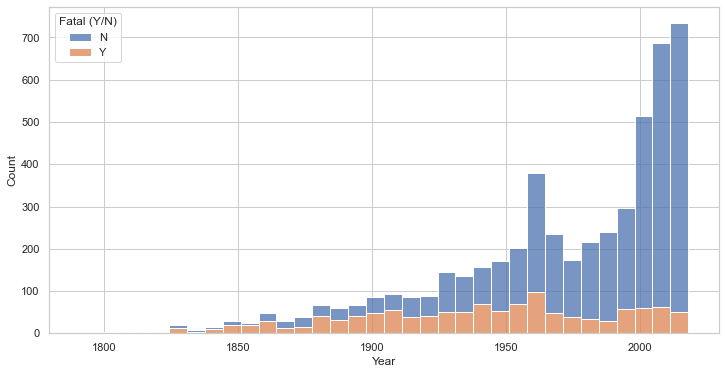

In [399]:
figure_four = sns.histplot(data=concatenated_sex_year_filter, x="Year", hue="Fatal (Y/N)", multiple="stack")
figure_four.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_four.jpg", dpi=1000)

In [52]:
condition_1 = (concatenated_sex_copy_two["Year"] > 2010)
concatenated_sex_year_filter_two = concatenated_sex_copy_two[condition_1]
concatenated_sex_year_filter_two

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246,2011.03.24,24-Mar-2011,2011,Unprovoked,MEXICO,Quintana Roo,"Gaviotas Beach, Cancun",Swimming,Liuba Taran,F,NaN,Lower leg & foot bitten,N,NaN,Bull shark,"Canadian press, 3/25/2011",5368
5247,2011.03.16,16-Mar-2011,2011,Unprovoked,AUSTRALIA,New South Wales,"Jimmys Beach, Port Stephens",Wakeboarding,Lisa Mondy,F,24,"Severe injuries to head, neck, shoulder & uppe...",N,13h00,3 m to 4 m shark,"The Sydney Morning Herald, 3/17/2011",5364
5248,2011.03.10.R,Reported 10-Mar-2010,2011,Invalid,EGYPT,South Sinai Peninsula,Sharm-el-Sheikh,NaN,female,F,NaN,"Apparent drowning, and subsequent scavenging b...",NaN,NaN,NaN,"Swindon Advertiser, 3/10/2011",5363
5249,2011.01.31,31-Jan-2011,2011,Unprovoked,MEXICO,Quintana Roo,Cancun,Swimming,Nicole Moore,F,38,"Leg, forearm & hand severely bitten",N,12h00,6' shark,"El Diario de Yucatan, 2/1/2011",5353


## Chart 5: Split of Fatal vs. non Fatal attacks for the last 10 years

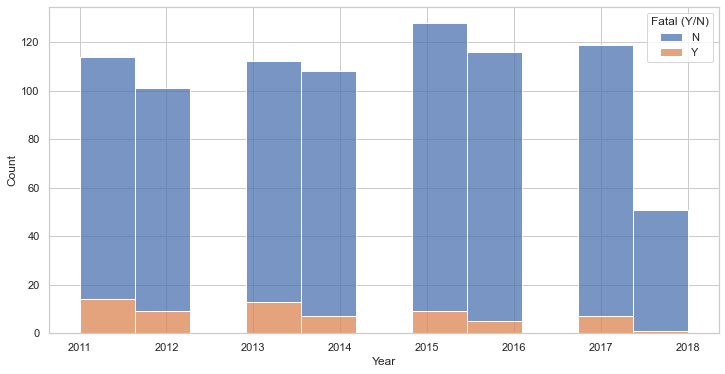

In [400]:
figure_five = sns.histplot(data=concatenated_sex_year_filter_two, x="Year", hue="Fatal (Y/N)", multiple="stack")
figure_five.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_five.jpg", dpi=1000)

## We can also filter by 2015 which is the year we are actually interested in

In [79]:
condition_1 = (concatenated_sex_copy_two["Year"] == 2015)
concatenated_sex_2015 = concatenated_sex_copy_two[condition_1]
concatenated_sex_2015

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
243,2015.12.26,26-Dec-2015,2015,Boating,SOUTH AFRICA,KwaZulu-Natal,Westbrook Beach,Kayak Fishing,Occupant: Grant Wardell,M,NaN,"No injury, kayak damaged",N,Morning,"White shark, 3 m","Traveller24, 12/26/2015",5983
244,2015.12.22,22-Dec-2015,2015,Unprovoked,USA,Hawaii,La'aloa Beach Park,Paddle boarding,Robert Ford,M,71,"No injury, shark bit board",N,Morning,9' shark,"West Hawaii Today, 12/23/2015",5981
245,2015.12.21.b,21-Dec-2015,2015,Unprovoked,AUSTRALIA,New South Wales,Bondi Beach,Surfing,Dean Norburn,M,43,"No injury, shark leapt on surfboard",N,07h00,"Bronze whaler shark, 6'","The Telegraph, 12/22/;2015",5980
246,2015.12.21.a,21-Dec-2015,2015,Unprovoked,BRAZIL,Pernambuco,Fernano de Noronha,Scuba diving,Márcio de Castro Palma,M,32,Right hand & part of forearm removed,N,NaN,"Tiger shark, 1.5 m","Fox News, 12/22/2015",5979
247,2015.12.19,19-Dec-2015,2015,Unprovoked,ARUBA,NaN,Boat capsized,Sea disaster,Adrian Esteban Rafael,M,58,FATAL,Y,NaN,NaN,"Fox News, 12/11/2015",5978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,2015.05.24,24-May-2015,2015,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming,Alysa Whetro,F,13,"Puncture wounds to lower left leg and ankle, s...",N,NaN,NaN,"WFTV, 5/27/2015",5881
5172,2015.04.29,29-Apr-2015,2015,Unprovoked,USA,Hawaii,Kanahena Cove,Snorkeling,Margaret Cruse,F,65,FATAL,Y,09h00,NaN,"Star Advertiser, 4/30/2015",5874
5173,2015.02.14,14-Feb-2015,2015,Unprovoked,REUNION,dÉtang-Salé,Ravine Mula,Swimming,Talon Bishop,F,22,FATAL,Y,18h30,"Tiger shark, 3.5 m","L'Yonne Républicaine, 2/14/2015",5856
5174,2015.01.19.a,19-Jan-2015,2015,Invalid,AUSTRALIA,New South Wales,"Wategos Beach, Byon Bay",Surfing & filming dolphins,Diane Ellis,F,NaN,Board snapped in two,NaN,NaN,Shark involvement not confirmed,"ABC North Coast, 1/21/2015",5847


## As well as getting the split by country so we can see the countries with the largest number of attacks

In [90]:
all_countries_split = concatenated_sex_2015["Country"].value_counts()
all_countries_split

USA                 73
AUSTRALIA           30
SOUTH AFRICA        10
FRENCH POLYNESIA     4
REUNION              4
MOZAMBIQUE           3
BAHAMAS              3
SPAIN                2
BRAZIL               2
FIJI                 1
ECUADOR              1
COSTA RICA           1
ARUBA                1
PUERTO RICO          1
NEW CALEDONIA        1
ITALY                1
EGYPT                1
MEXICO               1
THAILAND             1
Name: Country, dtype: int64

## Chart 6: Split of attacks by country for 2015

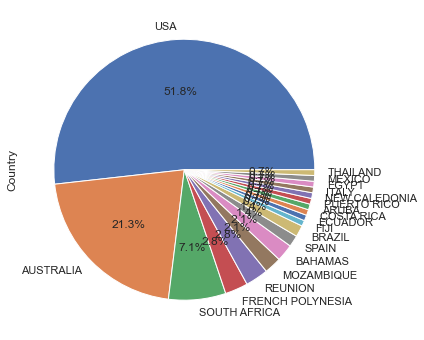

In [401]:
figure_six = all_countries_split.plot.pie(autopct="%.1f%%")
figure_six.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_six.jpg", dpi=1000)

In [85]:
all_countries = concatenated_sex_2015["Country"].value_counts().sum()
all_countries

141

## And now filtering that list so we can see the top 3 countries by attack counting

In [86]:
top_three = concatenated_sex_2015["Country"].value_counts()[:3]
top_three

USA             73
AUSTRALIA       30
SOUTH AFRICA    10
Name: Country, dtype: int64

## Chart 7: Top 3 countries by number of attacks 201

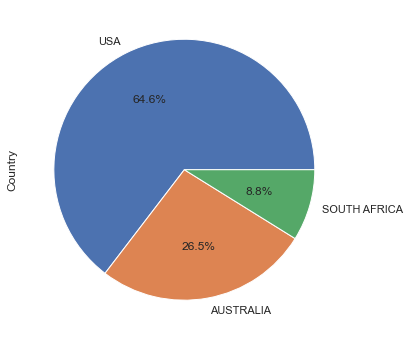

In [402]:
figure_seven = top_three.plot.pie(autopct="%.1f%%")
figure_seven.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_seven.jpg", dpi=1000)

In [87]:
top_three.sum()

113

## Actually, we can see that 80% of the attacks have happened within these top 3 countries in 2015

In [88]:
top_three_perc = top_three.sum() / all_countries
top_three_perc

0.8014184397163121

In [ ]:
condition_1 = (concatenated_sex_copy_two["Year"] == 2015)
concatenated_sex_2015 = concatenated_sex_copy_two[condition_1]
concatenated_sex_2015

In [103]:
condition_1 = (concatenated_sex_2015["Country"] == "USA")
condition_2 = (concatenated_sex_2015["Country"] == "AUSTRALIA")
condition_3 = (concatenated_sex_2015["Country"] == "SOUTH AFRICA")
df_hipo2 = concatenated_sex_2015[condition_1 | condition_2 | condition_3]
df_hipo2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
243,2015.12.26,26-Dec-2015,2015,Boating,SOUTH AFRICA,KwaZulu-Natal,Westbrook Beach,Kayak Fishing,Occupant: Grant Wardell,M,NaN,"No injury, kayak damaged",N,Morning,"White shark, 3 m","Traveller24, 12/26/2015",5983
244,2015.12.22,22-Dec-2015,2015,Unprovoked,USA,Hawaii,La'aloa Beach Park,Paddle boarding,Robert Ford,M,71,"No injury, shark bit board",N,Morning,9' shark,"West Hawaii Today, 12/23/2015",5981
245,2015.12.21.b,21-Dec-2015,2015,Unprovoked,AUSTRALIA,New South Wales,Bondi Beach,Surfing,Dean Norburn,M,43,"No injury, shark leapt on surfboard",N,07h00,"Bronze whaler shark, 6'","The Telegraph, 12/22/;2015",5980
250,2015.11.16,16-Nov-2015,2015,Unprovoked,USA,Florida,"Playalinda Beach, Brevard County",Surfing,Aaron Conti,M,NaN,Right heel injured,N,Afternoon,NaN,WFTV. 11/17/2015,5973
251,2015.11.15.a,15-Nov-2015,2015,Unprovoked,USA,Florida,"Ocean Reef Park, Singer Island, Palm Beach County",Surfing,Allen Engelman,M,28,Lacerations to hand,N,NaN,"Spinner shark, 7'","5WPTV, 11/15/2015",5971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,2015.05.29.b,29-May-2015,2015,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Standing,Ashlyn Gilpin,F,14,Left foot bitten,N,15h00,NaN,"Orlando Sentinel, 5/29/2015",5884
5170,2015.05.29.a,29-May-2015,2015,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Dakota Hatfield,F,19,Minor lacerations to dorsum of right foot,N,13h45,NaN,"ClickOrlando, 5/29/2015",5883
5171,2015.05.24,24-May-2015,2015,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming,Alysa Whetro,F,13,"Puncture wounds to lower left leg and ankle, s...",N,NaN,NaN,"WFTV, 5/27/2015",5881
5172,2015.04.29,29-Apr-2015,2015,Unprovoked,USA,Hawaii,Kanahena Cove,Snorkeling,Margaret Cruse,F,65,FATAL,Y,09h00,NaN,"Star Advertiser, 4/30/2015",5874


## Chart 8: Fatality of attack by gender for top 3 largest attacked countries, 2015

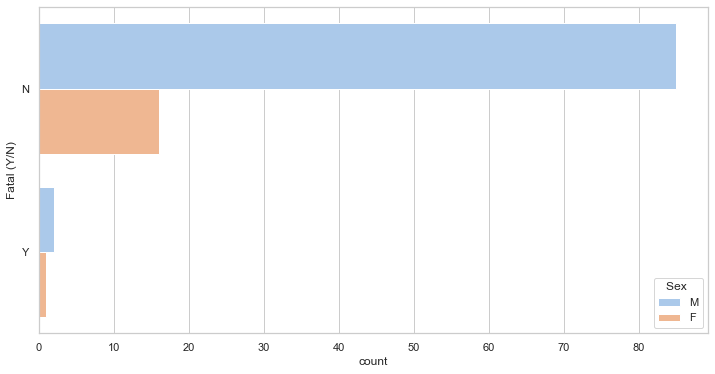

In [403]:
figure_eight = sns.countplot(y=df_hipo2["Fatal (Y/N)"], hue=df_hipo2["Sex "], palette="pastel")
figure_eight.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_eight.jpg", dpi=1000)

## Getting visibility of the "fatal" attacks for 2015

In [105]:
condition_1 = (df_hipo2["Fatal (Y/N)"] == "Y")
df_hipo2_fatal = df_hipo2[condition_1]
df_hipo2_fatal

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
294,2015.07.25,25-Jul-2015,2015,Unprovoked,AUSTRALIA,Tasmania,"Lachan Island, Mercury Passage",Scallop diving on hookah,Damien Johnson,M,46,FATAL,Y,10h00,"White shark, 3.9 to 4.2 m","C. Black, GSAF",5918
344,2015.02.09,09-Feb-2015,2015,Unprovoked,AUSTRALIA,New South Wales,Shelly Beach,Surfing,Tadashi Nakahara,M,41,FATAL,Y,10h00,3.5 to 4 m shark,"The Telegraph, 2/9/2015",5855
5172,2015.04.29,29-Apr-2015,2015,Unprovoked,USA,Hawaii,Kanahena Cove,Snorkeling,Margaret Cruse,F,65,FATAL,Y,09h00,NaN,"Star Advertiser, 4/30/2015",5874


In [106]:
fatal_cases_gender = df_hipo2_fatal["Sex "].value_counts()
fatal_cases_gender

M    2
F    1
Name: Sex , dtype: int64

## Chart 9: Split of Fatal cases by gender, 2015

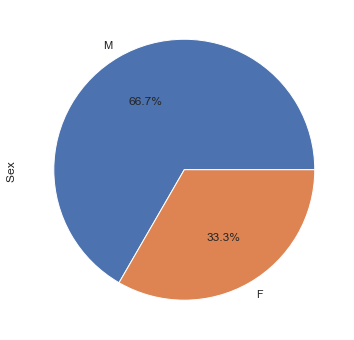

In [404]:
figure_nine = fatal_cases_gender.plot.pie(autopct="%.1f%%")
figure_nine.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_nine.jpg", dpi=1000)

# Hypothesis 3: People aged 30-50 have been the most injured people during summer (June-September) for the last 20 years, regardless of the hemisphere they live at

## Recovering the database previously used for reference

In [108]:
concatenated_sex.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Jun
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,Jun
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,Jun
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun


## Creation of a new column called "Month" using lambda on the column "Date"

In [109]:
concatenated_sex["Month"] = concatenated_sex["Date"].apply(lambda x: x.split("-"))

## Using regex to only focus on the actual months

In [110]:
concatenated_sex["Month"] = concatenated_sex["Date"].str.extract(r"\b(\D{3})\b")
concatenated_sex["Month"]

0       Jun
1       Jun
2       Jun
3       Jun
4       Jun
       ... 
5711    No 
5712    Jun
5713    NaN
5714    No 
5715    NaN
Name: Month, Length: 5716, dtype: object

In [78]:
concatenated_sex["Month"].value_counts()

Jul    608
Aug    553
Sep    513
Jun    458
Jan    451
Apr    422
Oct    407
Dec    381
Mar    371
Nov    362
May    358
Feb    337
No      25
 of      8
the      4
 -       4
Mid      4
 or      3
 B.      3
War      3
day      2
-Ap      2
 to      2
 A.      2
 &       1
mid      1
Day      1
 .       1
  A      1
.B.      1
few      1
         1
Name: Month, dtype: int64

In [117]:
all_months = concatenated_sex.copy()
all_months["Month"] = all_months["Month"].str.replace("No","Nov")
all_months.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month
1569,2000.09.29,29-Sep-2000,2000,Unprovoked,USA,California,"Mavericks, Half Moon Bay, San Mateo County",Sitting on surfboard,Peck Euwer,M,NaN,No injury,N,09h00,"White shark, 4.3 m [14']","P. Euwer, Ocean.com; D.W. Cole & M. DesJardins...",4300,Sep
3055,1961.08.16,16-Aug-1961,1961,Unprovoked,USA,South Carolina,"Pawleys Island, Georgetown County",Wading,William Lee Bailey,M,19,"Right arm bitten. Left leg bitten, surgically ...",N,08h00,White shark,C.O. Adams,2420,Aug
5477,1993.06.00,Jun-1993,1993,Unprovoked,USA,North Carolina,"Hamstead, Pender County",Swimming,Suzanne Pferrer,F,60's,"No injury, bumped by shark",N,Dusk,6' shark,C. Creswell,3807,Jun
4168,1920.11.04,04-Nov-1920,1920,Sea Disaster,PHILIPPINES,Leyte,NaN,The coastwise steamer San Basilio capsized in ...,male,M,NaN,FATAL,Y,NaN,NaN,"Oakland Tribune, 11/11/1920",1053,Novv
1698,1998.08.26,26-Aug-1998,1998,Unprovoked,USA,California,"Stinson Beach, Marin County",Boogie boarding,Jonathan Kathrein,M,16,"Thigh, buttocks & lower back lacerated",N,14h16,"White shark, 5 m to 6 m [16.5' to 20']","R. Collier, pp.163-164",4134,Aug
1173,2006.03.15,15-Mar-2006,2006,Unprovoked,AUSTRALIA,New South Wales,"Bondi, Sydney",Surfing,Blake Mohair,M,15,"No injury, shark nudged surfboard",N,17h00,"Bronze whaler shark, 2 m","The Australian, 3/15/2006",4806,Mar
5360,2005.04.13,13-Apr-2005,2005,Unprovoked,USA,Florida,"Crescent Beach, Sarasota County",Wading,Jessica Lynch,F,70,Right lower leg bitten,N,NaN,1.8 m [6'] blacktip shark,Herald Tribune.com,4707,Apr
105,2017.05.28,28-May-2017,2017,Unprovoked,USA,Florida,Off Jupiter,Feeding sharks,Randy Jordan,M,NaN,Lacerations to right arm,N,Morning,Tiger shark,"M. Michaelson, GSAF",6163,May
1122,2006.09.16,16-Sep-2006,2006,Unprovoked,USA,North Carolina,Onslow Beach,Surfing,Jake Poland,M,16,Laceration to left thigh,N,Morning,NaN,"C. Creswell, GSAF",4873,Sep
4576,1889.07.19,19-Jul-1889,1889,Unprovoked,USA,Texas,West Bay near Galveston,Fishing,John Bolling,M,NaN,Leg bitten,N,07h30,18' shark,"Galveston Daily News, 7/21/1889",586,Jul


In [297]:
all_months_two = all_months.copy()
all_months_two["Month"] = all_months_two["Month"].str.replace("Novv","Nov")
all_months_two.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month
104,2017.06.04,04-Jun-2017,2017,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,NaN,Laceration to shin,N,NaN,8' shark,"Nine News, 6/7/2017",6166,Jun
798,2010.07.02.a,02-Jul-2010,2010,Unprovoked,USA,California,"Dog Patch, San Onofre",Stand-Up Paddleboarding,David Bull,M,48,"No injury, board bumped by shark",N,15h15,8' shark,R. Collier,5286,Jul
4065,1927.04.10,20-Apr-1927,1927,Unprovoked,AUSTRALIA,Torres Strait,Near Thursday Island,Diving,"Napoleon Doola, a Murray Islander)",M,NaN,Extensive injuries to left leg,N,NaN,NaN,"J. Green, p.32; Bartlett, p. 160; V.M. Copples...",1175,Apr
523,2013.04.14,14-Apr-2013,2013,Unprovoked,SOUTH AFRICA,Western Cape Province,False Bay,Free diving,male,M,NaN,"""Light scratch on hand/wrist area""",N,NaN,Blue shark,"Cape Argus, 4/16/2013",5620,Apr
944,2008.09.28.a,28-Sep-2008,2008,Unprovoked,USA,Florida,Bethune Beach,Surfing,David Carr,M,40,Right foot bitten,N,11h00,+3' shark,S. Petersohn,5102,Sep
3477,1952.01.07,07-Jan-1952,1952,Unprovoked,AUSTRALIA,New South Wales,Evans Head,Surfing,Charles Thomas,M,NaN,Bitten on left calf and ankle,N,NaN,8' shark,"Canberra Times, 1/8/1952",1886,Jan
956,2008.08.30.a,30-Aug-2008,2008,Provoked,ENGLAND,North Devon,Lundy Island,Fishing,Stephen Perkins,M,52,Wrist bitten by hooked shark PROVOKED INCIDENT,N,NaN,Blue shark,"Telegraph.co.uk, 9/1/2008",5090,Aug
777,2010.09.04,04-Sep-2010,2010,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Kris Kerr,M,NaN,"No injury, shark charged surfboard",N,NaN,NaN,"CBS News, 9/10/2010",5313,Sep
3580,1948.12.05,05-Dec-1948,1948,Sea Disaster,NORTH PACIFIC OCEAN,Between Kwajalein Atoll & Johnston Island,500 nautical miles southwest of Johnston Island,Air/Sea Disaster involving C-54 Air Force Tran...,NaN,M,NaN,"32 survived, 5 perished; sharks fed on the dea...",Y,Dark,NaN,"L. Schultz & M. Malin, p.562; SAF Case #819",1769,Dec
675,2011.09.17,17-Sep-2011,2011,Unprovoked,KENYA,Coast Province,"Mama Ngina Beach, Mombasa",Swimming,NaN,M,17,FATAL,Y,NaN,NaN,"Mombasa411, 9/20/2011",5437,Sep


In [298]:
all_months_two["Month"].value_counts()

Jul     608
Aug     553
Sep     513
Jun     458
Jan     451
Apr     422
Oct     407
Dec     381
Mar     371
Nov     362
May     358
Feb     337
Nov      25
 of       8
the       4
 -        4
Mid       4
 or       3
 B.       3
War       3
day       2
-Ap       2
 to       2
 A.       2
 &        1
mid       1
Day       1
 .        1
  A       1
.B.       1
few       1
          1
Name: Month, dtype: int64

In [299]:
all_months["Month"].value_counts()

Jul     608
Aug     553
Sep     513
Jun     458
Jan     451
Apr     422
Oct     407
Dec     381
Mar     371
Novv    362
May     358
Feb     337
Nov      25
 of       8
the       4
 -        4
Mid       4
 or       3
 B.       3
War       3
day       2
-Ap       2
 to       2
 A.       2
 &        1
mid       1
Day       1
 .        1
  A       1
.B.       1
few       1
          1
Name: Month, dtype: int64

In [124]:
import numpy as np

## Creating a new column summarising the "Month" information

In [300]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] # Manually created list
all_months_two["Month"] = all_months_two["Month"].apply(lambda x: x if x in months else np.nan)
all_months_two

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Jun
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,Jun
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,Jun
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,ND.0082,"No date, Before 8-May-1965",0,Unprovoked,GREECE,Island of Volos,Eastern shore,Swimming,woman,F,NaN,FATAL,Y,NaN,NaN,"Sydney Morning Herald, 5/8/1965",72,NaN
5712,ND.0060,Before 19-Jun-1959,0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",58,Jun
5713,ND.0058,Before 1958,0,Unprovoked,FIJI,Kadavu Island Group,"18.8S, 178.25E",Swimming with fish attached to belt,Fijian girl,F,NaN,"""Severely injured when fish were seized by shark""",N,NaN,NaN,"V.M. Coppleson (1958), p.259",56,NaN
5714,ND.0023,No date,0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,NaN,Ankle bitten,N,NaN,NaN,"L. Green in Tavern of the Seas, p.182",24,NaN


In [301]:
all_months_two.isna().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     45
Area                       391
Location                   472
Activity                   391
Name                        63
Sex                          0
Age                       2291
Injury                      14
Fatal (Y/N)                457
Time                      2878
Species                   2585
Investigator or Source      15
original order               0
Month                      495
dtype: int64

In [302]:
all_months_two["Month"].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', nan], dtype=object)

In [303]:
all_months_two = all_months_two[all_months_two['Month'].notna()]
all_months_two

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Jun
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,Jun
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,Jun
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697,1852.07.28,28-Jul-1952,1852,Invalid,ATLANTIC OCEAN,NaN,NaN,NaN,Karen Bredesen Stræte,F,1,Death preceded shark involvement,NaN,NaN,Invalid,Norway Heritage,284,Jul
5698,1849.06.08.a,08-Jun-1849,1849,Unprovoked,USA,Florida,"Pensacola, Escambia County",Bathing,Mrs. Cracton,F,NaN,FATAL,Y,NaN,NaN,"Adams Sentinel, 8/6/1849",269,Jun
5699,1834.07.15.R,Reported 15-Jul-1834,1834,Unprovoked,FRENCH POLYNESIA,Society Islands,Tahiti,Swimming,Kaugatava Orurutm,F,NaN,FATAL,Y,NaN,Reported to involve a hammerhead shark,"Republican Banner, 7/15/1834",219,Jul
5700,1832.06.04,04-Jun-1832,1832,Unprovoked,AUSTRALIA,New South Wales,"South Head, Sydney",Fishing,Aboriginal female,F,NaN,Leg severed,N,NaN,NaN,"Sydney Herald, 6/11/1832",218,Jun


In [304]:
all_months_two["Month"].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul'], dtype=object)

In [305]:
all_months_two.isna().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     35
Area                       311
Location                   363
Activity                   308
Name                        56
Sex                          0
Age                       1889
Injury                       8
Fatal (Y/N)                419
Time                      2430
Species                   2264
Investigator or Source      11
original order               0
Month                        0
dtype: int64

## Creating another column with the information summarised in "Quarters" so we can see easily see the summer period

In [309]:
# creating a list with our conditions
all_months_two_copy = all_months_two.copy()
conditions = [
    (all_months_two["Month"] == "Jan") | (all_months_two["Month"] == "Feb") | (all_months_two["Month"] == "Mar"),
    (all_months_two["Month"] == "Apr") | (all_months_two["Month"] == "May") | (all_months_two["Month"] == "Jun"),
    (all_months_two["Month"] == "Jul") | (all_months_two["Month"] == "Aug") | (all_months_two["Month"] == "Sep"),
    (all_months_two["Month"] == "Oct") | (all_months_two["Month"] == "Nov") | (all_months_two["Month"] == "Dec")
    ]

# create a list of the values we want to assign for each condition
values = ['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']

# create a new column and use np.select to assign values to it using our lists as arguments
all_months_two_copy['Quarter'] = np.select(conditions, values)

# display updated DataFrame
all_months_two_copy.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun,Quarter 2
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Jun,Quarter 2
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,Jun,Quarter 2
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,Jun,Quarter 2
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun,Quarter 2


In [311]:
all_months_two_copy.head(50)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun,Quarter 2
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Jun,Quarter 2
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,Jun,Quarter 2
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,Jun,Quarter 2
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun,Quarter 2
5,2018.05.27,27-May-2018,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",6296,May,Quarter 2
6,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",6295,May,Quarter 2
7,2018.05.26.a,26-May-2018,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",6294,May,Quarter 2
8,2018.05.24,24-May-2018,2018,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",6293,May,Quarter 2
9,2018.05.21,21-May-2018,2018,Unprovoked,USA,South Carolina,"Isle of Palms, Charleston County",Boogie boarding,Trey de Boer,M,10,Injuries to lower right leg and foot,N,NaN,NaN,"C. Creswell, GSAF",6292,May,Quarter 2


In [310]:
all_months_two_copy["Quarter"].value_counts()

Quarter 3    1674
Quarter 2    1238
Quarter 1    1159
Quarter 4    1150
Name: Quarter, dtype: int64

In [333]:
all_months_two_copy

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun,Quarter 2
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Jun,Quarter 2
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,Jun,Quarter 2
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,Jun,Quarter 2
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697,1852.07.28,28-Jul-1952,1852,Invalid,ATLANTIC OCEAN,NaN,NaN,NaN,Karen Bredesen Stræte,F,1,Death preceded shark involvement,NaN,NaN,Invalid,Norway Heritage,284,Jul,Quarter 3
5698,1849.06.08.a,08-Jun-1849,1849,Unprovoked,USA,Florida,"Pensacola, Escambia County",Bathing,Mrs. Cracton,F,NaN,FATAL,Y,NaN,NaN,"Adams Sentinel, 8/6/1849",269,Jun,Quarter 2
5699,1834.07.15.R,Reported 15-Jul-1834,1834,Unprovoked,FRENCH POLYNESIA,Society Islands,Tahiti,Swimming,Kaugatava Orurutm,F,NaN,FATAL,Y,NaN,Reported to involve a hammerhead shark,"Republican Banner, 7/15/1834",219,Jul,Quarter 3
5700,1832.06.04,04-Jun-1832,1832,Unprovoked,AUSTRALIA,New South Wales,"South Head, Sydney",Fishing,Aboriginal female,F,NaN,Leg severed,N,NaN,NaN,"Sydney Herald, 6/11/1832",218,Jun,Quarter 2


## Extra cleaning in the "Year" variable as there were some "nan" values

In [313]:
all_months_two_copy["Year"].unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [314]:
all_months_year_filtered = all_months_two_copy[all_months_two_copy['Year'].notna()]
all_months_year_filtered

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun,Quarter 2
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Jun,Quarter 2
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,Jun,Quarter 2
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,Jun,Quarter 2
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697,1852.07.28,28-Jul-1952,1852,Invalid,ATLANTIC OCEAN,NaN,NaN,NaN,Karen Bredesen Stræte,F,1,Death preceded shark involvement,NaN,NaN,Invalid,Norway Heritage,284,Jul,Quarter 3
5698,1849.06.08.a,08-Jun-1849,1849,Unprovoked,USA,Florida,"Pensacola, Escambia County",Bathing,Mrs. Cracton,F,NaN,FATAL,Y,NaN,NaN,"Adams Sentinel, 8/6/1849",269,Jun,Quarter 2
5699,1834.07.15.R,Reported 15-Jul-1834,1834,Unprovoked,FRENCH POLYNESIA,Society Islands,Tahiti,Swimming,Kaugatava Orurutm,F,NaN,FATAL,Y,NaN,Reported to involve a hammerhead shark,"Republican Banner, 7/15/1834",219,Jul,Quarter 3
5700,1832.06.04,04-Jun-1832,1832,Unprovoked,AUSTRALIA,New South Wales,"South Head, Sydney",Fishing,Aboriginal female,F,NaN,Leg severed,N,NaN,NaN,"Sydney Herald, 6/11/1832",218,Jun,Quarter 2


## Filtered database so we can just focus on the last 20 years for ease

In [315]:
all_months_year_filtered_two = all_months_year_filtered.copy()
condition_1 = (all_months_year_filtered["Year"] > 2000)
last_twenty_years = all_months_year_filtered_two[condition_1]
last_twenty_years

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun,Quarter 2
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Jun,Quarter 2
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,Jun,Quarter 2
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,Jun,Quarter 2
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,2001.07.26,26-Jul-2001,2001,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",NaN,female,F,NaN,Survived,N,NaN,NaN,SAF,4374,Jul,Quarter 3
5405,2001.07.24,24-Jul-2001,2001,Unprovoked,USA,Florida,"Marathon , Monroe County",NaN,female,F,NaN,2 bites behind knee,N,NaN,Nurse shark,"Key West Citizen, 7/26/2001",4372,Jul,Quarter 3
5406,2001.06.03,03-Jun-2001,2001,Unprovoked,USA,South Carolina,"Off 21st Avenue, Isle of Palms, Charleston County",Wading,Mary Pound,F,29,3 puncture wounds on each side of her left hand,N,Shortly before 13h00,2' shark,"C. Creswell, GSAF, Charleston Post & Courier, ...",4361,Jun,Quarter 2
5408,2001.02.11,11-Feb-2001,2001,Invalid,MALAYSIA,Off the western coast of peninsular Malaysia,Pulau Pangkor (Pangkor Island),Unknown,female,F,NaN,Bones recovered by fishermen in 300-kg [662-lb...,NaN,NaN,Shark involvement prior to death was not confi...,Associated Press,4328,Feb,Quarter 1


## Chart 10: Number of cases by Year and by Quarter

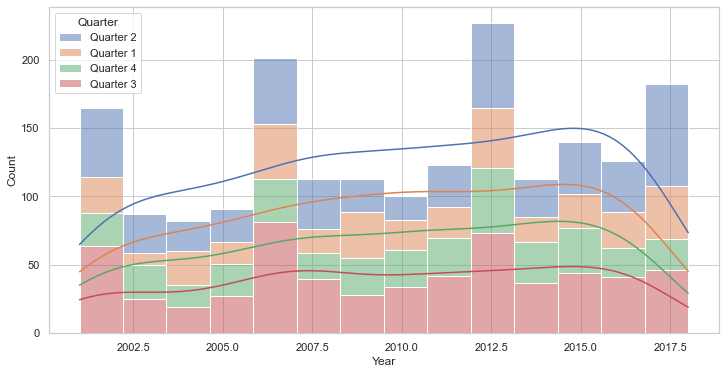

In [405]:
figure_ten = sns.histplot(data=last_twenty_years, x= "Year", hue="Quarter", multiple="stack",kde=True)
figure_ten.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_ten.jpg", dpi=1000)

In [340]:
all_months_three = last_twenty_years[last_twenty_years['Age'].notna()]
all_months_three

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun,Quarter 2
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun,Quarter 2
5,2018.05.27,27-May-2018,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",6296,May,Quarter 2
6,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",6295,May,Quarter 2
7,2018.05.26.a,26-May-2018,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",6294,May,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,2001.08.29,29-Aug-2001,2001,Unprovoked,USA,Florida,"Coquina Beach, Anna Maria Island, Manatee County",Standing,Kristi Herzberg,F,29,Punctures & lacerations on elbow & forearm,N,13h30,NaN,"Sarasota Herald-Tribune, 8/31/2001",4391,Aug,Quarter 3
5401,2001.08.19.b,19-Aug-2001,2001,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Becky Chapman,F,17,Lacerations to lower leg,N,13h06,NaN,"E. Ritter & S. Petersohn, GSAF; Orlando Sentin...",4384,Aug,Quarter 3
5402,2001.08.19.a,19-Aug-2001,2001,Unprovoked,USA,Florida,"Wilbur-by-the-Sea, Volusia County",Surfing,female,F,17,Left foot lacerated,N,11h20,NaN,"S. Petersohn, GSAF; Orlando Sentinel, 8/20/200...",4383,Aug,Quarter 3
5406,2001.06.03,03-Jun-2001,2001,Unprovoked,USA,South Carolina,"Off 21st Avenue, Isle of Palms, Charleston County",Wading,Mary Pound,F,29,3 puncture wounds on each side of her left hand,N,Shortly before 13h00,2' shark,"C. Creswell, GSAF, Charleston Post & Courier, ...",4361,Jun,Quarter 2


In [341]:
all_months_three.isna().sum()

Case Number                 0
Date                        0
Year                        0
Type                        1
Country                     1
Area                       37
Location                   45
Activity                   42
Name                        6
Sex                         0
Age                         0
Injury                      0
Fatal (Y/N)               100
Time                      296
Species                   492
Investigator or Source      3
original order              0
Month                       0
Quarter                     0
dtype: int64

In [342]:
last_twenty_years["Age"].value_counts()

20           55
15           52
16           46
19           44
21           43
             ..
72            1
50s           1
18 months     1
82            1
8 or 10       1
Name: Age, Length: 97, dtype: int64

In [343]:
only_numbers_age = last_twenty_years.copy()
only_numbers_age["Age"] = only_numbers_age["Age"].str.extract("(\d{1,2})")
only_numbers_age


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun,Quarter 2
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300,Jun,Quarter 2
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299,Jun,Quarter 2
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",6298,Jun,Quarter 2
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,2001.07.26,26-Jul-2001,2001,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",NaN,female,F,NaN,Survived,N,NaN,NaN,SAF,4374,Jul,Quarter 3
5405,2001.07.24,24-Jul-2001,2001,Unprovoked,USA,Florida,"Marathon , Monroe County",NaN,female,F,NaN,2 bites behind knee,N,NaN,Nurse shark,"Key West Citizen, 7/26/2001",4372,Jul,Quarter 3
5406,2001.06.03,03-Jun-2001,2001,Unprovoked,USA,South Carolina,"Off 21st Avenue, Isle of Palms, Charleston County",Wading,Mary Pound,F,29,3 puncture wounds on each side of her left hand,N,Shortly before 13h00,2' shark,"C. Creswell, GSAF, Charleston Post & Courier, ...",4361,Jun,Quarter 2
5408,2001.02.11,11-Feb-2001,2001,Invalid,MALAYSIA,Off the western coast of peninsular Malaysia,Pulau Pangkor (Pangkor Island),Unknown,female,F,NaN,Bones recovered by fishermen in 300-kg [662-lb...,NaN,NaN,Shark involvement prior to death was not confi...,Associated Press,4328,Feb,Quarter 1


In [344]:
only_numbers_age["Age"].value_counts()

20    59
15    52
16    46
18    44
21    44
      ..
84     1
82     1
74     1
72     1
75     1
Name: Age, Length: 75, dtype: int64

In [345]:
only_numbers_age["Age"].unique()

array(['48', nan, '18', '52', '15', '12', '32', '10', '21', '30', '60',
       '33', '29', '54', '34', '41', '37', '56', '19', '25', '69', '38',
       '35', '45', '14', '40', '28', '20', '24', '26', '22', '7', '31',
       '17', '13', '42', '50', '46', '82', '73', '68', '16', '39', '58',
       '55', '57', '47', '61', '65', '36', '43', '9', '49', '72', '59',
       '11', '27', '64', '23', '71', '44', '62', '6', '63', '70', '53',
       '51', '8', '66', '77', '74', '3', '5', '86', '84', '75'],
      dtype=object)

In [346]:
cleaned_ages = only_numbers_age.copy()
cleaned_ages = cleaned_ages.dropna(subset=["Age"])
cleaned_ages

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun,Quarter 2
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun,Quarter 2
5,2018.05.27,27-May-2018,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",6296,May,Quarter 2
6,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",6295,May,Quarter 2
7,2018.05.26.a,26-May-2018,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",6294,May,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,2001.08.29,29-Aug-2001,2001,Unprovoked,USA,Florida,"Coquina Beach, Anna Maria Island, Manatee County",Standing,Kristi Herzberg,F,29,Punctures & lacerations on elbow & forearm,N,13h30,NaN,"Sarasota Herald-Tribune, 8/31/2001",4391,Aug,Quarter 3
5401,2001.08.19.b,19-Aug-2001,2001,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Becky Chapman,F,17,Lacerations to lower leg,N,13h06,NaN,"E. Ritter & S. Petersohn, GSAF; Orlando Sentin...",4384,Aug,Quarter 3
5402,2001.08.19.a,19-Aug-2001,2001,Unprovoked,USA,Florida,"Wilbur-by-the-Sea, Volusia County",Surfing,female,F,17,Left foot lacerated,N,11h20,NaN,"S. Petersohn, GSAF; Orlando Sentinel, 8/20/200...",4383,Aug,Quarter 3
5406,2001.06.03,03-Jun-2001,2001,Unprovoked,USA,South Carolina,"Off 21st Avenue, Isle of Palms, Charleston County",Wading,Mary Pound,F,29,3 puncture wounds on each side of her left hand,N,Shortly before 13h00,2' shark,"C. Creswell, GSAF, Charleston Post & Courier, ...",4361,Jun,Quarter 2


In [347]:
cleaned_ages["Age"].unique()

array(['48', '18', '52', '15', '12', '32', '10', '21', '30', '60', '33',
       '29', '54', '34', '41', '37', '56', '19', '25', '69', '38', '35',
       '45', '14', '40', '28', '20', '24', '26', '22', '7', '31', '17',
       '13', '42', '50', '46', '82', '73', '68', '16', '39', '58', '55',
       '57', '47', '61', '65', '36', '43', '9', '49', '72', '59', '11',
       '27', '64', '23', '71', '44', '62', '6', '63', '70', '53', '51',
       '8', '66', '77', '74', '3', '5', '86', '84', '75'], dtype=object)

In [349]:
cleaned_ages["Age"].value_counts().sum()

1450

## Addition of "Age Range" column so we can summarise the information in the variable "Age"

In [351]:
# Create a new column with age ranges
range_ages = cleaned_ages.copy()
conditions = [
    (cleaned_ages["Age"] <= "10"),
    (cleaned_ages["Age"] > "10") & (cleaned_ages["Age"] <= "20"),
    (cleaned_ages["Age"] > "20") & (cleaned_ages["Age"] <= "30"),
    (cleaned_ages["Age"] > "30") & (cleaned_ages["Age"] <= "40"),
    (cleaned_ages["Age"] > "40") & (cleaned_ages["Age"] <= "50"),
    (cleaned_ages["Age"] > "50") & (cleaned_ages["Age"] <= "60"),
    (cleaned_ages["Age"] > "60") & (cleaned_ages["Age"] <= "70"),
    (cleaned_ages["Age"] > "70") & (cleaned_ages["Age"] <= "80"),
    (cleaned_ages["Age"] > "80") & (cleaned_ages["Age"] <= "90"),
    (cleaned_ages["Age"] > "90") & (cleaned_ages["Age"] <= "100"),
    ]

# create a list of the values we want to assign for each condition
values = ['0-10', '10-20', '20-30', '30-40','40-50','50-60','60-70','70-80','80-90','90-100']

# create a new column and use np.select to assign values to it using our lists as arguments
range_ages['Age Range'] = np.select(conditions, values)

# display updated DataFrame
range_ages.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter,Age Range
0,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301,Jun,Quarter 2,40-50
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297,Jun,Quarter 2,10-20
5,2018.05.27,27-May-2018,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",6296,May,Quarter 2,50-60
6,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",6295,May,Quarter 2,10-20
7,2018.05.26.a,26-May-2018,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",6294,May,Quarter 2,10-20


In [389]:
range_ages["Age Range"].value_counts().sum()

1450

## Chart 11: Number of attacks by Age Range and Quarter

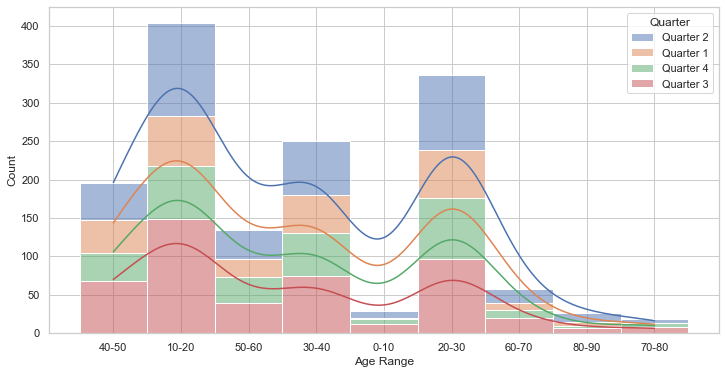

In [406]:
figure_eleven = sns.histplot(data=range_ages, x= "Age Range", hue="Quarter", multiple="stack",kde=True)
figure_eleven.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_eleven.jpg", dpi=1000)

In [330]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

In [381]:
condition_1 = (range_ages["Quarter"] == "Quarter 3")
ultimate_filter = range_ages[condition_1]
ultimate_filter.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Month,Quarter,Age Range
781,2010.08.29,29-Aug-2010,2010,Invalid,BAHAMAS,Exuma Islands,"Off Jaws Beach, New Providence Island",Swimming after boat became disabled,Judson Newton,M,43,His partial remains were recovered from a 12' ...,NaN,NaN,Shark involvement prior to death was not confi...,"P.Nunez, Tribune",5309,Aug,Quarter 3,40-50
1486,2001.09.30.b,30-Sep-2001,2001,Unprovoked,MEXICO,Guerrero,Ixtapa,Body surfing,Brian Lavelle,M,26,Hand injured,N,Late morning,"Tiger shark, 1.8 m [6']",T. Carlson,4407,Sep,Quarter 3,20-30
5212,2013.07.15,15-Jul-2013,2013,Unprovoked,REUNION,Saint-Paul,Le cimetière marin,Swimming & snorkeling,Sarah Roperh,F,15,FATAL,Y,14h15,NaN,"Clicanoo, 7/15/2013",5649,Jul,Quarter 3,10-20
390,2014.08.16,16-Aug-2014,2014,Unprovoked,AUSTRALIA,Western Australia,Gnaraloo,Spearfishing,Adam Haling,M,31,Lacerations to face and neck,N,NaN,reef shark,"Herald Sun, 8/21/2014",5789,Aug,Quarter 3,30-40
670,2011.09.28.a,28-Sep-2011,2011,Unprovoked,SOUTH AFRICA,Western Cape Province,Clovely Beach,Swimming,Michael Cohen,M,43,"Right leg severed, left leg lacerated",N,12h25,White shark,"News 24, 9/29/2011",5442,Sep,Quarter 3,40-50


## Chart 12: Number of cases by Sex and Age Range between July-September, last 20 years

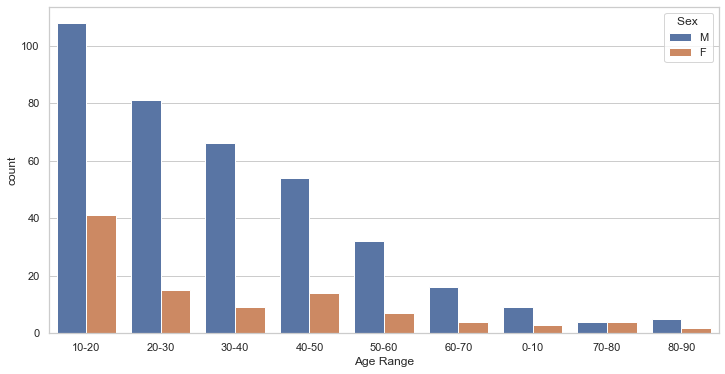

In [407]:
figure_twelve = sns.countplot(x="Age Range", hue="Sex ", data = ultimate_filter,order = ultimate_filter['Age Range'].value_counts().index)
figure_twelve.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_twelve.jpg", dpi=1000)

In [393]:
ranges_total = ultimate_filter["Age Range"].value_counts()
ranges_total

10-20    149
20-30     96
30-40     75
40-50     68
50-60     39
60-70     20
0-10      12
70-80      8
80-90      7
Name: Age Range, dtype: int64

## Chart 13: Percentage of cases by Age Range between July-September, last 20 years

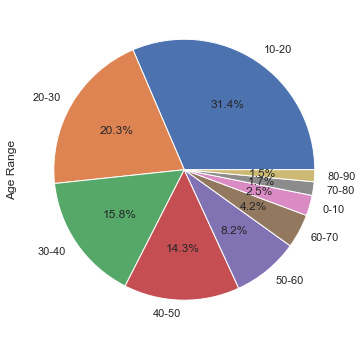

In [408]:
figure_thirteen = ranges_total.plot.pie(autopct="%.1f%%")
figure_thirteen.figure.savefig("/Users/Marc/Desktop/lectures/Project-1-Pandas/images/figure_thirteen.jpg", dpi=1000)

In [390]:
ranges = ultimate_filter["Age Range"].value_counts().sum()
ranges

474